#Фабарисов Дмитрий. Выпуклый анализ и оптимизация. Задание 1.

In [50]:
import cvxopt as cp
cp.solvers.options['show_progress'] = False

from copy import deepcopy as dp
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat

import cv2
import skimage.io as sk

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [72]:
def show_pic(pic_list, name = ['picture']*100, figsize_ = (7, 7)):
    fig = figure(figsize = figsize_)
    for idx in range(len(pic_list)):
        subplot = fig.add_subplot(1, len(pic_list), idx+1)
        sk.imshow(pic_list[idx], cmap = 'gray')
        subplot.set_title(name[idx])

## Читаем данные

In [40]:
set1 = loadmat('set1.mat')
set2 = loadmat('set2.mat')
set3 = loadmat('set3.mat')

A1 = np.matrix(set1['A'])
b1 = np.matrix(set1['b'])
A2 = np.matrix(set2['A'])
b2 = np.matrix(set2['b'])
A3 = np.matrix(set3['A'])
b3 = np.matrix(set3['b'])

In [41]:
ones_str = np.ones(300)
ones_str = np.matrix(ones_str)
print ones_str.shape
print A1.shape

(1, 300)
(300, 2500)


## Посмотрим на плотность лучей в разных областях

1


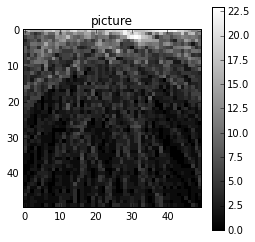

In [42]:
col_sums = ones_str * A1
print len(col_sums)
col_sums = col_sums.reshape(50, 50)
show_pic([col_sums])

##Запишем уравнения ограничения

Учитываем, что $\forall i \rightarrow0 \le x[i] \le 1$. В обозначениях с CVXOPT User's Guide имеем:

In [43]:
x_size = 2500

G = cp.matrix(concatenate((np.identity(x_size), -np.identity(x_size)), axis = 0))
h = cp.matrix(concatenate((np.ones(x_size), np.zeros(x_size))))

## Запишем квадратичную форму для оптимизиции

In [75]:
q1 = cp.matrix(-b1.T * A1).T
q2 = cp.matrix(-b2.T * A2).T
q3 = cp.matrix(-b3.T * A3).T

In [46]:
def kernel(i, j, n):
    ix = i / n
    iy = i % n
    jx = j / n
    jy = j % n
    return 1 if abs(ix - jx) <= 1 and abs(iy - jy) <= 1 else 0

def qp_params(kernel, n):
    P = matrix(zeros((n, n)))
    
    for i in range(n):
        for j in range(n):
            if i != j:
                ker = kernel(i, j)
                P[i, j] -= ker
                P[i, i] += 0.5 * ker
                P[j, j] += 0.5 * ker
    
    return P

P = qp_params(lambda i,j:kernel(i, j, 50), 2500)

In [67]:
def binarise(pic, koef):
    pic_new = dp(pic)
    pic_new[pic_new >= koef] = 1
    pic_new[pic_new < koef] = 0
    return pic_new

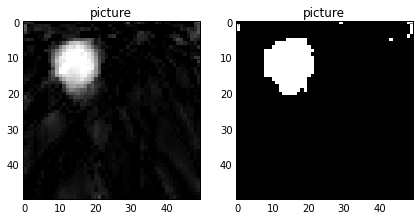

In [77]:
alpha = 1.1
sol = cp.solvers.qp(cp.matrix(alpha * 2 * P + A1.T * A1), q, G, h)
binar = binarise(np.matrix(sol['x']).reshape(50,50), 0.3)
show_pic([np.matrix(sol['x']).reshape(50,50), binar])

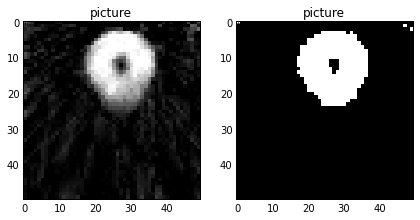

In [85]:
alpha = 0.8
sol = cp.solvers.qp(cp.matrix(alpha * 2 * P + A2.T * A2), q2, G, h)
binar = binarise(np.matrix(sol['x']).reshape(50,50), 0.35)
show_pic([np.matrix(sol['x']).reshape(50,50), binar])

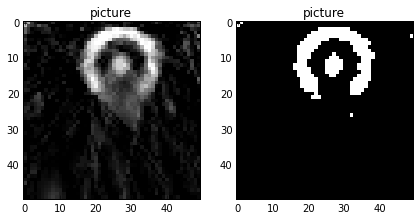

In [89]:
alpha = 0.8
sol = cp.solvers.qp(cp.matrix(alpha * 2 * P + A3.T * A3), q3, G, h)
binar = binarise(np.matrix(sol['x']).reshape(50,50), 0.4)
show_pic([np.matrix(sol['x']).reshape(50,50), binar])